# Prediction of Clicks
Kaggle competition: peedicting click through rate ratio. <br>
Work taken from here: <br>
https://github.com/rachit-mishra/Avazu-Click-Through-Rate-Prediction/blob/master/avazu_project.ipynb <br>
About data: <br>
https://www.kaggle.com/c/avazu-ctr-prediction/data

In [1]:
# Import functions

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load data

In [2]:
import random
n = 40428966  #total number of records in the clickstream data 
sample_size = 10000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 
# parse date
parse_date = lambda x: pd.datetime.strptime(x, "%y%m%d%H")

data = pd.read_csv("train_kaggle_clicks.csv", skiprows = skip_values, parse_dates=['hour'], date_parser = parse_date)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 24 columns):
id                  10001 non-null uint64
click               10001 non-null int64
hour                10001 non-null datetime64[ns]
C1                  10001 non-null int64
banner_pos          10001 non-null int64
site_id             10001 non-null object
site_domain         10001 non-null object
site_category       10001 non-null object
app_id              10001 non-null object
app_domain          10001 non-null object
app_category        10001 non-null object
device_id           10001 non-null object
device_ip           10001 non-null object
device_model        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
C14                 10001 non-null int64
C15                 10001 non-null int64
C16                 10001 non-null int64
C17                 10001 non-null int64
C18                 10001 non-null int64
C19        

In [6]:
data['hour'].head()

0   2014-10-21
1   2014-10-21
2   2014-10-21
3   2014-10-21
4   2014-10-21
Name: hour, dtype: datetime64[ns]

In [7]:
data.hour.describe()

count                   10001
unique                    240
top       2014-10-22 09:00:00
freq                      126
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

# Exploratory Data Analysis

In [8]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10188060833085237177,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,c7f29df3,7801e8d9,...,4,0,21665,320,50,2493,3,35,-1,117
1,10517184705995899473,0,2014-10-21,1005,1,85f751fd,c4e18dd6,50e219e0,dd15efc4,b9528b13,...,1,2,18993,320,50,2161,0,35,-1,157
2,10652041592093320557,1,2014-10-21,1005,1,0a742914,510bd839,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100075,23
3,11325648358010968430,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,c776ba2a,7801e8d9,...,4,0,21309,320,50,2449,0,163,100105,91
4,11649721175004217002,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,1,2,6560,320,50,571,2,39,-1,32


In [9]:
data.shape

(10001, 24)

# Click- nonClick dictribution

0    8262
1    1739
Name: click, dtype: int64

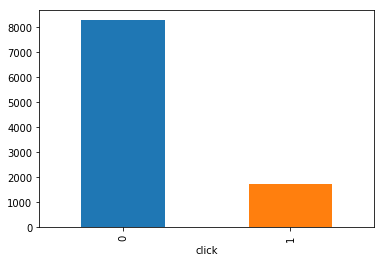

In [10]:
%matplotlib inline

data.groupby('click').size().plot(kind='bar')

data.click.value_counts()


In [ ]:
# Comment: Unbalanced set !

# Feature Engineering

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 26 columns):
id                  10001 non-null uint64
click               10001 non-null int64
hour                10001 non-null datetime64[ns]
C1                  10001 non-null int64
banner_pos          10001 non-null int64
site_id             10001 non-null object
site_domain         10001 non-null object
site_category       10001 non-null object
app_id              10001 non-null object
app_domain          10001 non-null object
app_category        10001 non-null object
device_id           10001 non-null object
device_ip           10001 non-null object
device_model        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
C14                 10001 non-null int64
C15                 10001 non-null int64
C16                 10001 non-null int64
C17                 10001 non-null int64
C18                 10001 non-null int64
C19        

In [11]:
df_impressions = data.groupby('hour').agg({'click':'sum'})

In [12]:
df_impressions

,click
hour,
2014-10-21 00:00:00,7
2014-10-21 01:00:00,9
2014-10-21 02:00:00,16
2014-10-21 03:00:00,4
2014-10-21 04:00:00,9
2014-10-21 05:00:00,10
2014-10-21 06:00:00,8
2014-10-21 07:00:00,8
2014-10-21 08:00:00,7


In [16]:
df_impressions.head()

,click
hour,
2014-10-21 00:00:00,7
2014-10-21 01:00:00,9
2014-10-21 02:00:00,16
2014-10-21 03:00:00,4
2014-10-21 04:00:00,9


In [17]:
df_impressions.unstack().head()

       hour               
click  2014-10-21 00:00:00     7
       2014-10-21 01:00:00     9
       2014-10-21 02:00:00    16
       2014-10-21 03:00:00     4
       2014-10-21 04:00:00     9
dtype: int64

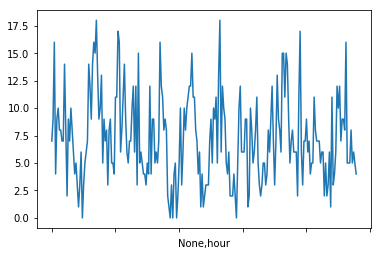

In [21]:
df_impressions.unstack().plot()

In [22]:
data['day_of_week'] = data['hour'].apply(lambda x: x.dayofweek)

In [23]:
data['hour_in_day'] = data['hour'].apply(lambda x: x.hour)

In [24]:
data.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,day_of_week,hour_in_day
9996,8020306301360556209,0,2014-10-30 23:00:00,1005,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,...,23929,320,50,2743,0,163,100141,17,3,23
9997,8120679548229595427,0,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,23161,320,50,2667,0,47,-1,221,3,23
9998,9118488768980453248,0,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,20508,320,50,2351,3,163,-1,61,3,23
9999,9999636335882369227,1,2014-10-30 23:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,3c4b944d,2347f47a,...,16859,320,50,1887,3,39,100194,23,3,23
10000,9999746639881208566,0,2014-10-30 23:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,22257,320,50,2545,0,431,100084,221,3,23


## Create feature: Hour in Day

In [25]:
data.groupby(['hour_in_day','click']).size().head()

hour_in_day  click
0            0        175
             1         35
1            0        175
             1         37
2            0        245
dtype: int64

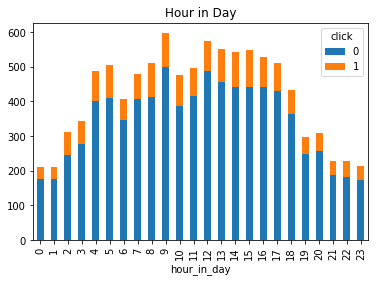

In [26]:
data.groupby(['hour_in_day','click']).size().unstack().plot(kind='bar', stacked=True, title='Hour in Day')

## Create feature: Week of Day

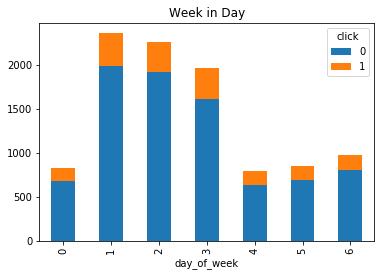

In [47]:
data.groupby(['day_of_week','click']).size().unstack().plot(kind='bar', stacked=True, title='Week in Day')

## Check: site_id, site_domain, site_category

In [116]:
site_fts =['site_id','site_domain','site_category']
data[site_fts].astype('object').describe()

,site_id,site_domain,site_category
count,10001,10001,10001
unique,579,496,15
top,85f751fd,c4e18dd6,50e219e0
freq,3574,3692,4061


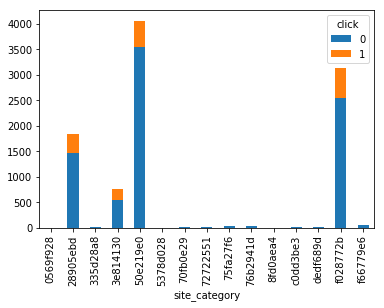

In [117]:
data.groupby(['site_category','click']).size().unstack().plot(kind='bar',stacked=True)

## Check: Banner Position

In [49]:
data['banner_pos'].value_counts()

0    7177
1    2809
7      11
4       2
5       1
2       1
Name: banner_pos, dtype: int64

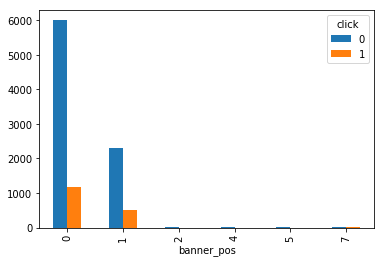

In [53]:
data.groupby(['banner_pos','click']).size().unstack().plot(kind='bar')

In [ ]:
# Banner positions 0 and 1 are gathering most impressions

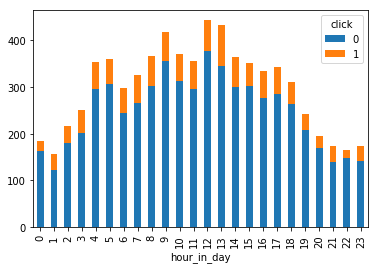

In [59]:
data[data['banner_pos']==0].groupby(['hour_in_day','click']).size().unstack().plot(kind='bar',stacked=True)

## Check: app_category, app_domain, app_id

In [110]:
app_fts = ['app_category','app_domain','app_id']
data[app_fts].astype('object').describe()

,app_category,app_domain,app_id
count,10001,10001,10001
unique,15,41,454
top,07d7df22,7801e8d9,ecad2386
freq,6520,6802,6427


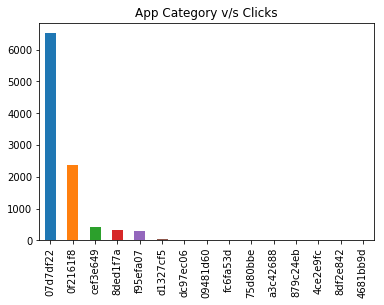

In [75]:
data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

07d7df22    6520
0f2161f8    2360
cef3e649     425
8ded1f7a     339
f95efa07     278
d1327cf5      26
dc97ec06      15
09481d60      14
fc6fa53d       5
75d80bbe       5
a3c42688       4
879c24eb       3
4ce2e9fc       3
8df2e842       2
4681bb9d       2
Name: app_category, dtype: int64


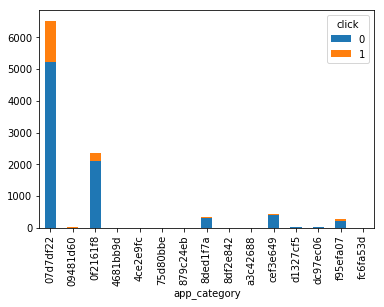

In [81]:
print (data['app_category'].value_counts())
data.groupby(['app_category','click']).size().sort_values().unstack().plot(kind='bar', stacked=True)

In [82]:
data.groupby(['app_category','click']).size().sort_values()

app_category  click
dc97ec06      1           1
4681bb9d      0           2
8df2e842      0           2
09481d60      1           3
4ce2e9fc      0           3
879c24eb      0           3
d1327cf5      1           4
a3c42688      0           4
fc6fa53d      0           5
75d80bbe      0           5
09481d60      0          11
dc97ec06      0          14
d1327cf5      0          22
cef3e649      1          33
8ded1f7a      1          38
f95efa07      1          66
              0         212
0f2161f8      1         257
8ded1f7a      0         301
cef3e649      0         392
07d7df22      1        1295
0f2161f8      0        2103
07d7df22      0        5225
dtype: int64

In [87]:
data.groupby(['app_category','click']).size().unstack().sort_index(axis=1, ascending=False)

click,1,0
app_category,,
07d7df22,1295.0,5225.0
09481d60,3.0,11.0
0f2161f8,257.0,2103.0
4681bb9d,NaN,2.0
4ce2e9fc,NaN,3.0
75d80bbe,NaN,5.0
879c24eb,NaN,3.0
8ded1f7a,38.0,301.0
8df2e842,NaN,2.0


In [83]:
data.groupby(['app_category','click']).size().unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 07d7df22 to fc6fa53d
Data columns (total 2 columns):
0    15 non-null float64
1    8 non-null float64
dtypes: float64(2)
memory usage: 360.0+ bytes


In [ ]:
# Comment: two categories dominant compared to others !

In [112]:
print (data['app_id'].value_counts().head())
#data.groupby(['app_id','click']).size().unstack().plot(kind='bar', stacked=True)

ecad2386    6427
92f5800b     371
e2fcccd2     276
9c13b419     183
febd1138     172
Name: app_id, dtype: int64


7801e8d9    6802
2347f47a    1262
ae637522     453
5c5a694b     276
d9b5648e     180
Name: app_domain, dtype: int64


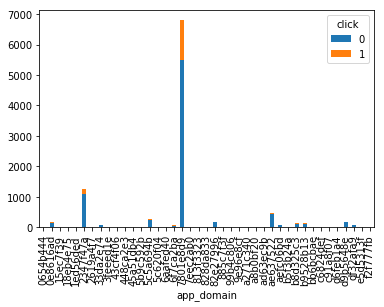

In [113]:
print (data['app_domain'].value_counts().head())
data.groupby(['app_domain','click']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
# Comment: app_domain two are more prominent then others !

## C1, C14-C21 features

In [93]:
c_fts = ['C1','C14','C15','C16','C17','C18','C19','C20','C21']
#data[c_fts].describe()
data[c_fts].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,10001,10001,10001,10001,10001,10001,10001,10001,10001
unique,7,956,6,7,333,4,58,125,54
top,1005,4687,320,50,1722,0,35,-1,23
freq,9174,270,9327,9443,1147,4249,3095,4673,2177


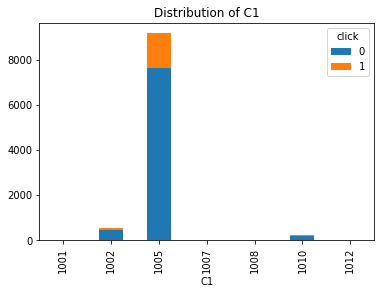

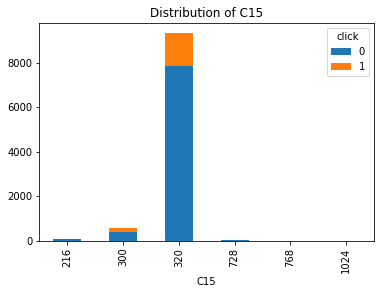

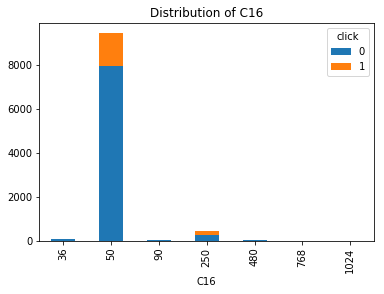

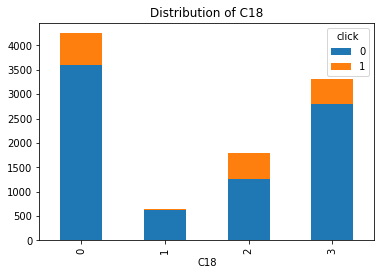

In [100]:
data.groupby(['C1','click']).size().unstack().plot(kind='bar', stacked=True, title='Distribution of C1')
data.groupby(['C15','click']).size().unstack().plot(kind='bar', stacked=True, title='Distribution of C15')
data.groupby(['C16','click']).size().unstack().plot(kind='bar', stacked=True, title='Distribution of C16')
data.groupby(['C18','click']).size().unstack().plot(kind='bar', stacked=True, title='Distribution of C18')

## Check: device_id, device_ip, device_model, device_type, device_conn_type

In [102]:
dev_fts = ['device_id','device_ip','device_model','device_type','device_conn_type']

In [104]:
data[dev_fts].astype('object').describe()

,device_id,device_ip,device_model,device_type,device_conn_type
count,10001,10001,10001,10001,10001
unique,1727,9062,1379,4,4
top,a99f214a,6b9769f2,8a4875bd,1,0
freq,8259,41,622,9212,8637


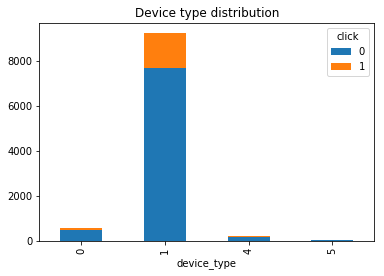

In [107]:
data.groupby(['device_type','click']).size().unstack().plot(kind='bar', stacked=True, title = 'Device type distribution')

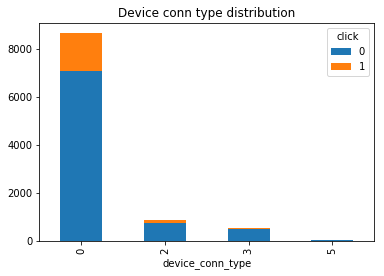

In [108]:
data.groupby(['device_conn_type','click']).size().unstack().plot(kind='bar', stacked=True, title = 'Device conn type distribution')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 26 columns):
id                  10001 non-null uint64
click               10001 non-null int64
hour                10001 non-null datetime64[ns]
C1                  10001 non-null int64
banner_pos          10001 non-null int64
site_id             10001 non-null object
site_domain         10001 non-null object
site_category       10001 non-null object
app_id              10001 non-null object
app_domain          10001 non-null object
app_category        10001 non-null object
device_id           10001 non-null object
device_ip           10001 non-null object
device_model        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
C14                 10001 non-null int64
C15                 10001 non-null int64
C16                 10001 non-null int64
C17                 10001 non-null int64
C18                 10001 non-null int64
C19        

# PREDICTION MODEL

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 26 columns):
id                  10001 non-null uint64
click               10001 non-null int64
hour                10001 non-null datetime64[ns]
C1                  10001 non-null int64
banner_pos          10001 non-null int64
site_id             10001 non-null object
site_domain         10001 non-null object
site_category       10001 non-null object
app_id              10001 non-null object
app_domain          10001 non-null object
app_category        10001 non-null object
device_id           10001 non-null object
device_ip           10001 non-null object
device_model        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
C14                 10001 non-null int64
C15                 10001 non-null int64
C16                 10001 non-null int64
C17                 10001 non-null int64
C18                 10001 non-null int64
C19        

In [122]:
model_fts = ['day_of_week', 'hour_in_day',
                  'banner_pos', 'site_category',
                   'app_category',
                  'device_type','device_conn_type']

model_label = 'click'

In [123]:
train_model = data[model_fts + [model_label]]

In [124]:
train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
day_of_week         10001 non-null int64
hour_in_day         10001 non-null int64
banner_pos          10001 non-null int64
site_category       10001 non-null object
app_category        10001 non-null object
device_type         10001 non-null int64
device_conn_type    10001 non-null int64
click               10001 non-null int64
dtypes: int64(6), object(2)
memory usage: 625.1+ KB


In [125]:
# Encoding categorical variables
def one_hot_fts(df, fts_set):
    new_df = pd.get_dummies(df, columns = fts_set, sparse = True)
    return new_df

In [126]:
train_model_enc = one_hot_fts(train_model, ['day_of_week','banner_pos','site_category','app_category',
                  'device_type','device_conn_type'])

In [137]:
#train_model_enc.info()

In [132]:
# Extracting features for modeling: exclide only label
model_fts_enc = np.array(train_model_enc.columns[train_model_enc.columns!=model_label].tolist())


In [134]:
from sklearn.model_selection import train_test_split


In [136]:
x_train, x_test, y_train, y_test = train_test_split(
    train_model_enc[model_fts_enc].values,
    train_model_enc[model_label].values,
    test_size=0.3,
    random_state=42
)

## Feature Selection 

~ To reduce the dimensional space occupied and to deal with overfitting, use GRID SEARCH cross validation and regularization to obtain trade off b/w number of features and F-1 score**

In [138]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score

**F1 score used as a performance metric because it represents the harmonic mean between precision and recall**